<a href="https://colab.research.google.com/github/TheGAITORClub/Resources/blob/KyleDampier/Lectures/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [2]:
import numpy as np # https://numpy.org/doc/
import pandas as pd # https://pandas.pydata.org/docs/

## Load CSV Files

In [3]:
# Load Data from GitHub (test) - FROM https://www.kaggle.com/c/titanic/data
housing_test = pd.read_csv('https://raw.githubusercontent.com/TheGAITORClub/Resources/KyleDampier/Lectures/Data/titanic_test.csv')
housing_train = pd.read_csv('https://raw.githubusercontent.com/TheGAITORClub/Resources/KyleDampier/Lectures/Data/titanic_train.csv')

## DataFrame helper functions

In [4]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
housing_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The goal of this dataset it to predict the `Survived` column

In [6]:
housing_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualization - Matplotlib

## Categorized Data

In [7]:
# housing_train['Survived'] = housing_train['Survived'].astype('category')

## By Gender

<AxesSubplot:xlabel='Sex,Survived'>

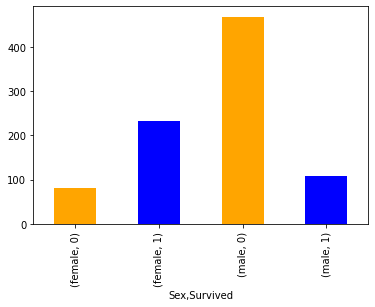

In [8]:
# convert to category
housing_train['Sex'] = housing_train['Sex'].astype('category')

count_gender_survived = housing_train.groupby(['Sex', 'Survived']).size()
count_gender_survived.plot.bar(x='Sex', y='Survived', color=['orange', 'blue'])

<AxesSubplot:xlabel='Sex'>

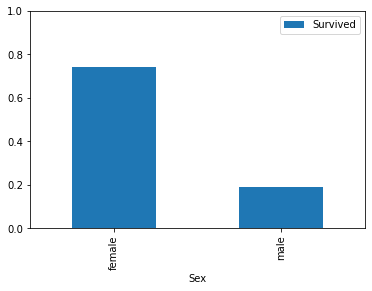

In [9]:
mean_gender_survived = housing_train.groupby('Sex').agg({"Survived": np.mean})
mean_gender_survived.plot.bar(ylim=(0, 1))

# By Age

## Age Groups

From [here](https://www.statcan.gc.ca/en/concepts/definitions/age2)

- \< 15 years
- 16-30 years
- 31-45 years
- 46-60 years
- 61-75 years
- \> 75 years




In [10]:
# categorize the data

housing_train['AgeRange'] = pd.cut(housing_train['Age'], bins=range(0, 100, 10), include_lowest=True)
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeRange     714 non-null    category
dtypes: category(2), float64(2), int64(5), object(4)
memory usage: 79.0+ KB


<AxesSubplot:xlabel='AgeRange'>

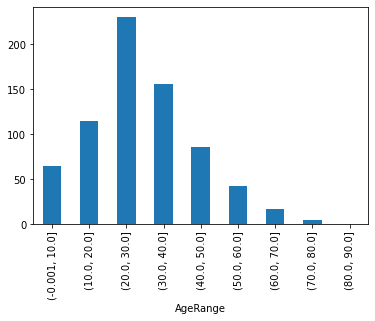

In [11]:
count_age = housing_train.groupby('AgeRange').size()
count_age.plot.bar(x='AgeRange', y='Survived')

<AxesSubplot:xlabel='AgeRange'>

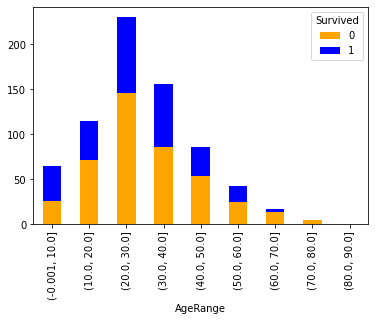

In [12]:
count_age_survived = housing_train.groupby(['AgeRange', 'Survived']).size().unstack()
count_age_survived.plot.bar(color=['orange', 'blue'], stacked=True)

<AxesSubplot:xlabel='AgeRange,Sex'>

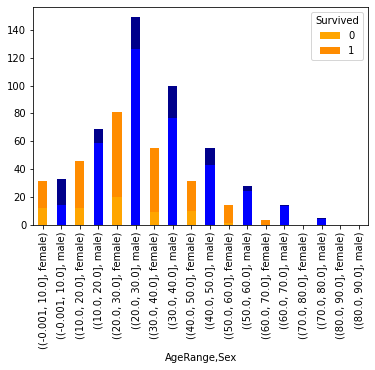

In [14]:
count_age_sex = housing_train.groupby(['AgeRange', 'Sex', 'Survived']).size().unstack()
count_age_sex.plot.bar(color=[['orange', 'blue'], ['darkorange', 'darkblue']], stacked=True)

<AxesSubplot:xlabel='AgeRange'>

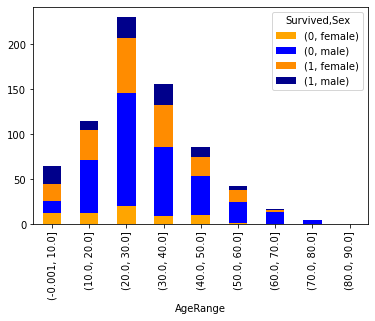

In [15]:
count_age_sex.unstack().plot.bar(color=['orange', 'blue', 'darkorange', 'darkblue'], stacked=True)

# Flower Data

## Seaborn

In [16]:
import seaborn as sns

In [17]:
iris = sns.load_dataset('iris')

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
iris.describe()
# iris.groupby('species').describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Bar Graphs

<AxesSubplot:xlabel='species'>

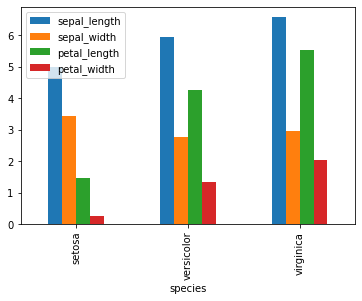

In [21]:
iris.groupby('species').mean().plot.bar()

## Scatter Plots

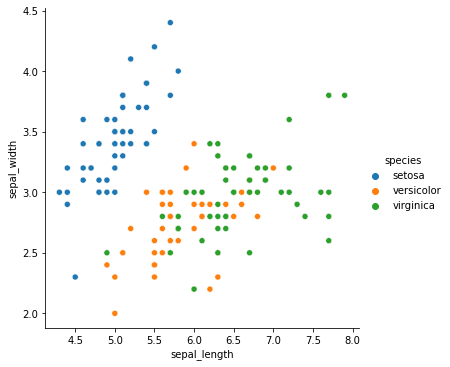

In [22]:
import matplotlib.pyplot as plt

plot1 = sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

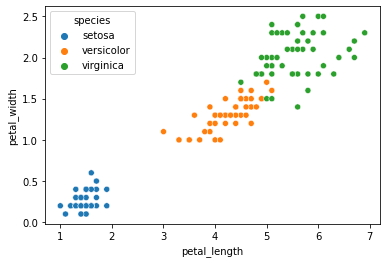

In [23]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')

## Facet Grids

/Users/kyledampier/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


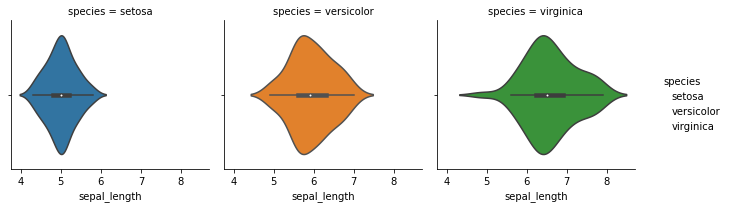

In [24]:
multi_plot = sns.FacetGrid(iris, col='species', hue='species', height=3)
multi_plot.map(sns.violinplot, 'sepal_length')
multi_plot.add_legend()

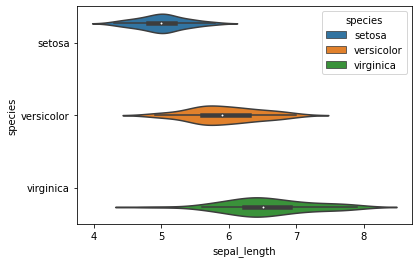

In [27]:
same_plot = sns.violinplot(x='sepal_length', y='species', data=iris, hue='species')

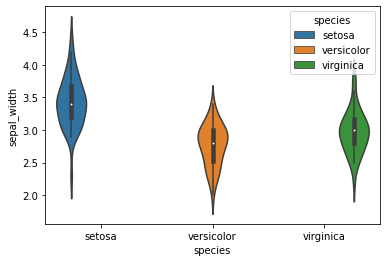

In [28]:
same_plot = sns.violinplot(x='species', y='sepal_width', data=iris, hue='species')

## Joint Plots

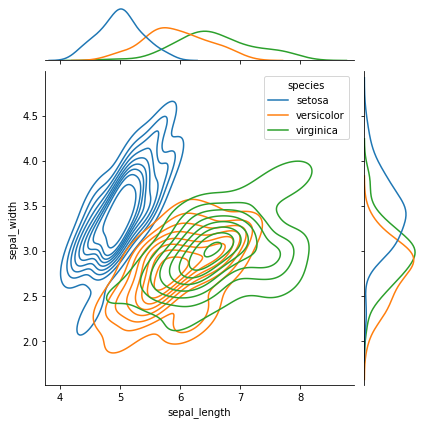

In [31]:
# joint_plot = sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='reg', hue='species')
joint_plot = sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde', hue='species')

## Pair Plots

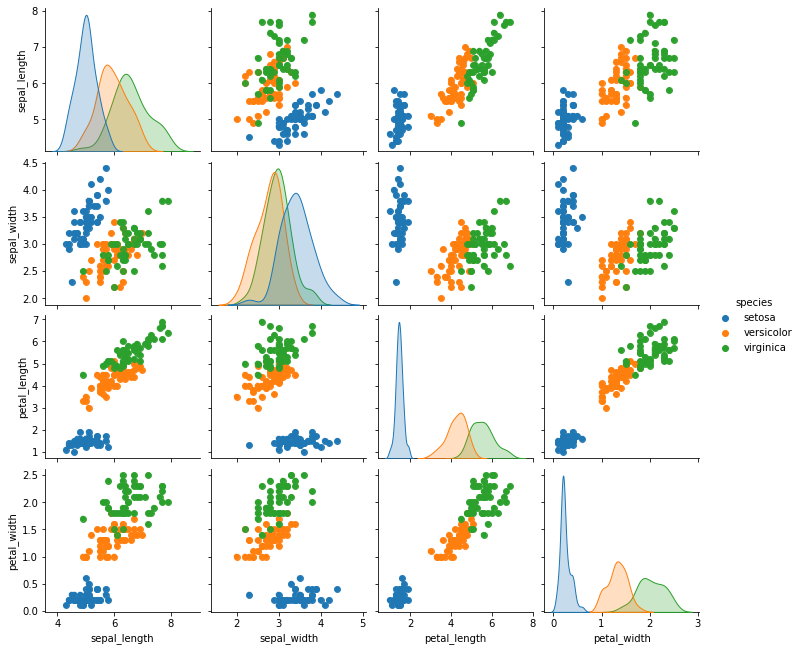

In [32]:
plot2 = sns.pairplot(iris, hue='species', kind='scatter')
plot2 = plot2.map_offdiag(plt.scatter,s=35,alpha=0.9)
plt.subplots_adjust(top=0.9)

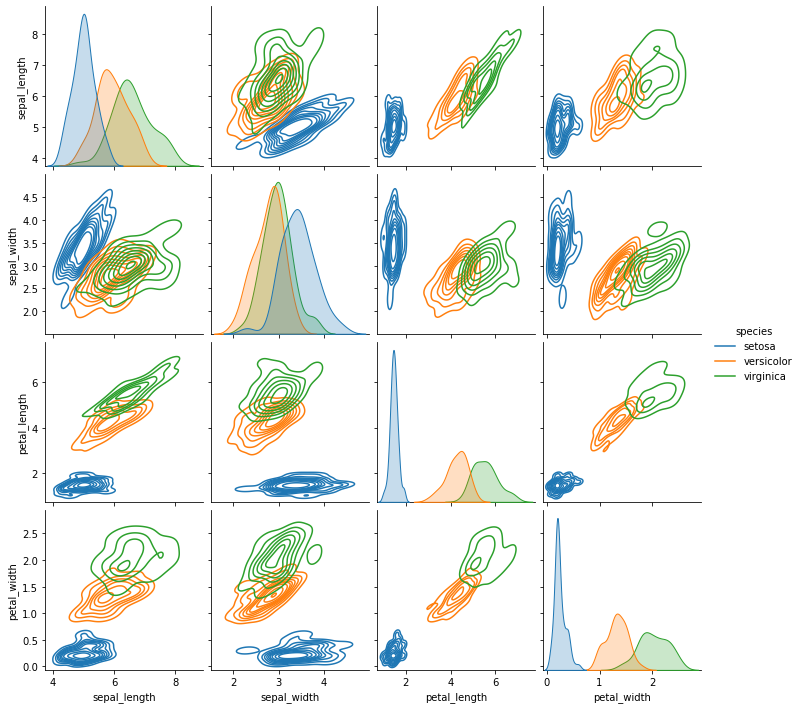

In [33]:
new_pair = sns.pairplot(iris, hue='species', kind='kde')

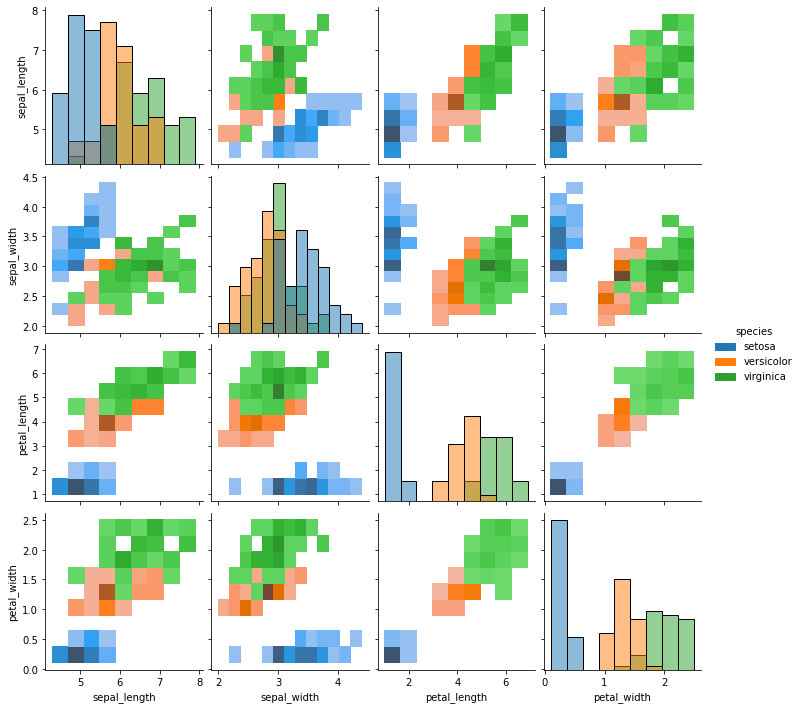

In [34]:
new_pair = sns.pairplot(iris, hue='species', kind='hist')

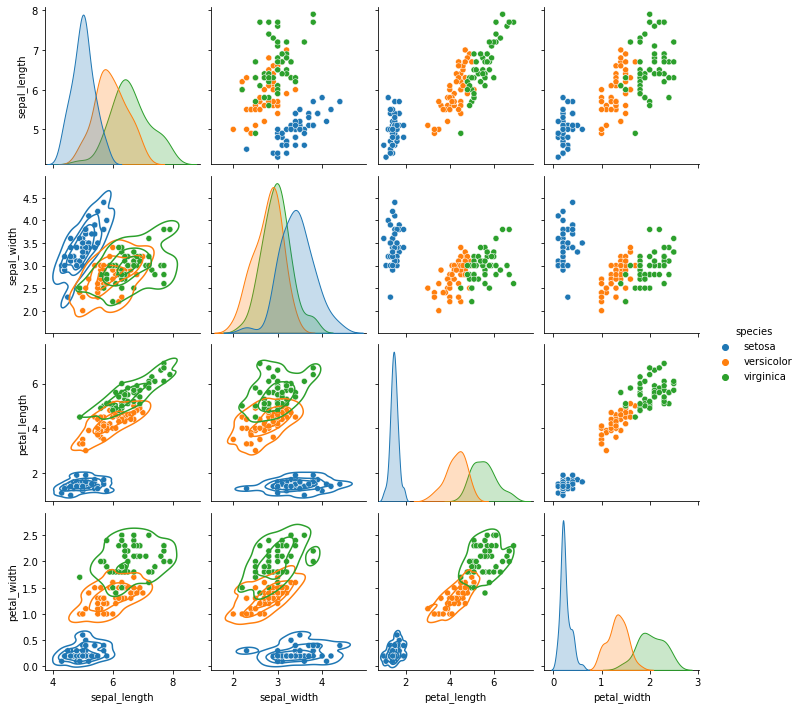

In [35]:
plot2 = sns.pairplot(iris, hue='species', kind='scatter')
plot2 = plot2.map_lower(sns.kdeplot, levels=4, color=".2")


# Train Test Split

We need to have data to test our models

![train_test_split](https://www.machinecurve.com/wp-content/uploads/2020/11/feed-3.jpg)

We need to generate the train and test from our dataset

In [37]:
from sklearn.model_selection import train_test_split # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

# Can name the anything, this is standard practice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

|X        |   Y         |
----------|-------------|
|X_train  |   Y_train   | 
|X_test   |   Y_test    | 
|X_val    |   Y_val     | 

# Random Forest Classifier

## Train Model

In [38]:
from sklearn.ensemble import RandomForestClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

# Predict

In [39]:
# this is all you have to do, we just use already made functions
predictions = clf.predict(X_test)

In [40]:
from sklearn import metrics # https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9555555555555556


## What did we get wrong?

In [44]:
y_test.index = range(len(y_test))

In [45]:
# BING BONG! new method `enumerate`
for i, prediction in enumerate(predictions):
    if (predictions[i] != y_test[i]):
        print(y_test[i], prediction)

versicolor virginica
virginica versicolor


In [46]:
from sklearn.metrics import confusion_matrix # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

confusion_matrix(y_test, predictions)

array([[19,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 14]])